In [1]:
# import appropriate analysis and ml tools

import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import  svm
from sklearn import model_selection, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
#import the raw data
raw_data = pd.read_csv("C:/Users/Mamdouh Mashaal/Desktop/Dataset/breast-cancer-wisconsin.data", 
                       names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"])
print(raw_data.shape)
raw_data.head()

(683, 11)


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# drop ID and Class columns
raw_data2 = raw_data.drop(['id','Class'], axis=1)

# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
norm_data = (raw_data2 - np.mean(raw_data2)) / np.std(raw_data2)
norm_data.head()

# map class variable to 1's (malignant) and 0's (benign)
norm_data['Class'] = raw_data['Class'].map({4:1, 2:0})
norm_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484,0
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484,0
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484,0
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0


In [4]:
# divide normalized data into features and labels
features = norm_data.drop('Class', axis=1)
labels = norm_data['Class']
print(labels.head())
features.head()
print(features.shape)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
(683, 9)


In [5]:
# split data into training and test features and labels using 30% of data as validation/test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(478, 9) (478,)
(205, 9) (205,)


In [6]:
def svc_param_selection(X, y, nfolds):
    """ When using a SVM with a polynomial kernel there are two hyperparameters to tune. The value of C and 
    the degree of the polynomial, d. This function, svc_param_selection will find the optimal pair of (C, degree)
    that gives the best results on a test set using sklearn's GridSearchCV (cross validation) method."""
    #the slack penalty hyperparameter
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    #degrees of polynomial kernel of svc
    degrees = [1, 2, 3, 4, 5]
    #initialize the paremeter grid as dictionary
    param_grid = {'C': Cs, 'degree' : degrees}
    #initialize search for best parameters using input nfold cross validation
    search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    #fit the search object to input training data
    search.fit(X, y)
    #return the best parameters
    search.best_params_
    return search.best_params_

In [7]:
svc_param_selection(X_train, y_train, 10)

{'C': 10, 'degree': 1}

In [8]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
degrees = [1, 2, 3, 4, 5]

train_acc = []
test_acc = []

for d in degrees:
    for c in Cs:
        #print("C = ", c, ", degree = ", d)
        svc = svm.SVC(C=c, degree=d, kernel='poly')
        svc.fit(X_train, y_train)
        #print(svc.score(X_train, y_train))
        train_acc.append((svc.score(X_train, y_train)))
        #print((svc.score(X_test, y_test)))
        test_acc.append((svc.score(X_test, y_test)))
#print(max(test_acc))

In [9]:
final_svc_poly = svm.SVC(C=.1, degree=1, kernel='poly')
final_svc_poly.fit(X_train, y_train)
final_svc_poly.score(X_test, y_test)

0.975609756097561

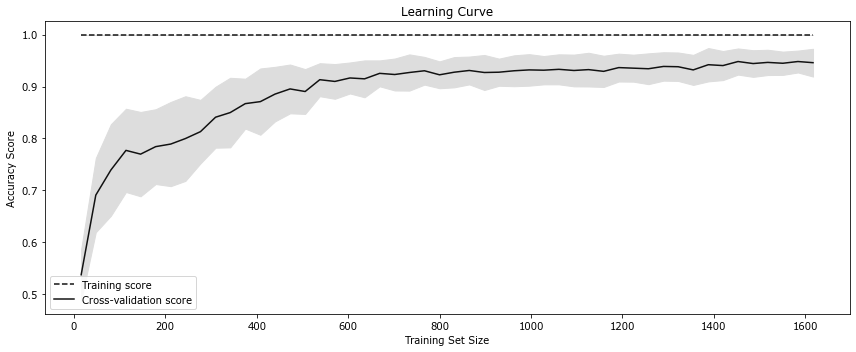

In [10]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
%matplotlib inline
#load data
raw_data=load_digits()

train_scores=[y_train, X_train]
test_scores=[y_test,X_train]
#create feature matrix and target vector 
x,y=raw_data.data, raw_data.target

#Plot Learning Curve 
#Create CV training and test scores for various training set sizes 
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), x, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(12,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, final_svc_poly.predict(X_test))
cm


print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])




Confusion matrix

 [[127   2]
 [  3  73]]

True Positives(TP) =  127

True Negatives(TN) =  73

False Positives(FP) =  2

False Negatives(FN) =  3


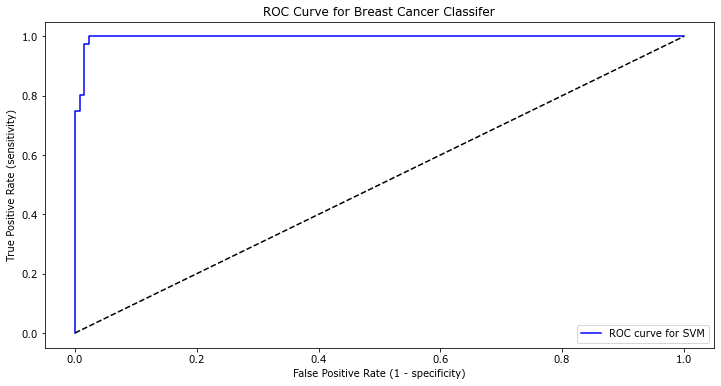

In [12]:
from sklearn.metrics import roc_curve
y_score = final_svc_poly.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)


fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve for SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve for Breast Cancer Classifer')
plt.legend(loc="lower right")

1.0


(Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, 'Training\\Validation'))

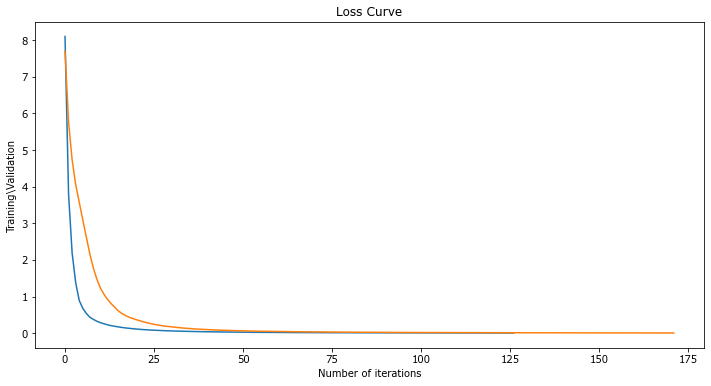

In [13]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)
X_tr,X_val,y_tr,y_val=model_selection.train_test_split(X_train,y_train,test_size=0.3)
mlp=MLPClassifier(activation="relu",max_iter=3000)
fig, ax = plt.subplots(1, figsize=(12, 6))
mlp.fit(X_train,y_train)
print (mlp.score(X_train,y_train))
plt.plot(mlp.loss_curve_)
mlp.fit(X_val,y_val)
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Number of iterations"), plt.ylabel("Training\Validation")